# Estructuras Discretas 2023-1
# Práctica 5: Lógica Secuencial

Víctor Germán Mijangos de la Cruz: vmijangosc@ciencias.unam.mx

Teresa Becerril Torres: terebece1508@ciencias.unam.mx

**Integrantes del equipo:**

* Decuir Fuentes Rodrigo André
* Durán Tapia Emilio

## 1. Pulsos de reloj.

Un *reloj* es una señal continua que cada cierto tiempo cambia de valor y permite determinar cuándo es necesario actualizar a un elemento que contiene un estado (memoria).

**Esquema de un reloj**

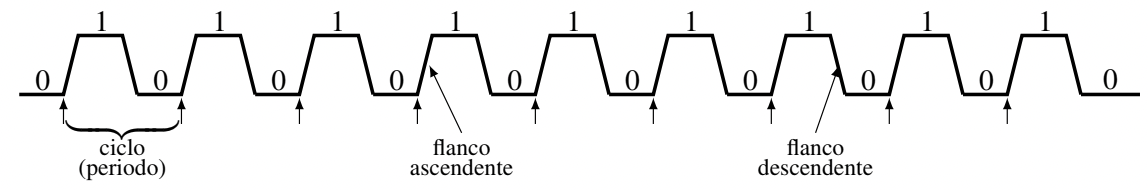

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def clock_pulse(t, period = 1):
    """
    Función que genera un reloj discreto a partir del seno.
    """
    return 1 * (np.sin(period * t) > 0)

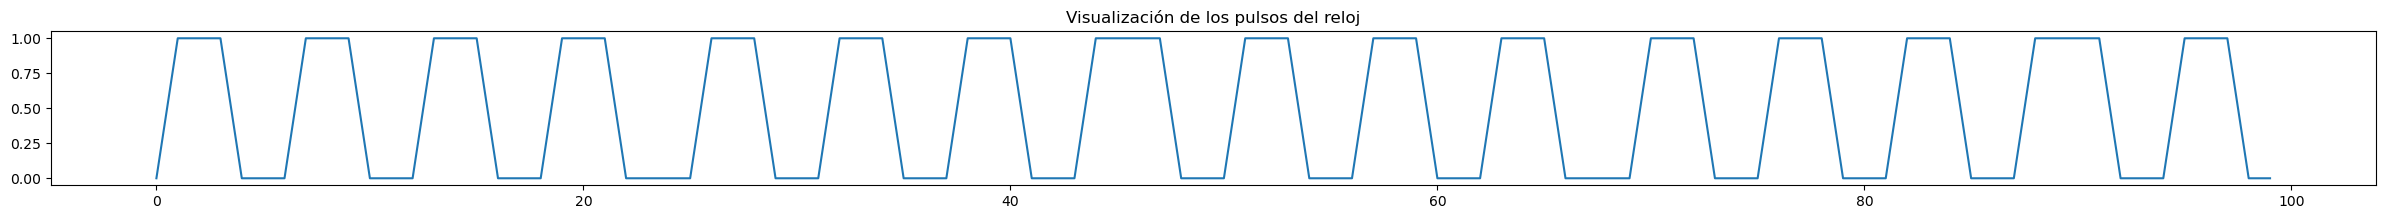

In [2]:
plt.figure(figsize = (30, 2))
plt.plot([clock_pulse(t) for t in range(0, 100)])
plt.title('Visualización de los pulsos del reloj')
plt.show()

## 2. FlipFlop SR Asíncrono
Es un tipo de flip-flop Set-Reset sin ciclos de reloj. 

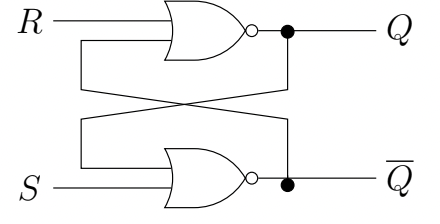

In [3]:
class FlipFlopSR(object):
    """
    Simulación de un circuito de flip-flop SR.
    """
    def __init__(self, Q = 0):
        self.Q = Q
        self.notQ = 1 - Q
    
    def run(self, S, R):
        #Si S == 1 y R == 1:
        self.Q = S or (1 - R) * self.Q
        self.notQ = 1 - self.Q
        
        return self.Q, self.notQ

In [4]:
SR = FlipFlopSR()
print(1, 0, SR.run(S = 1, R = 0))
print(0, 0, SR.run(S = 0, R = 0))
print(0, 1, SR.run(S = 0, R = 1))
print(0, 0, SR.run(S = 0, R = 0))

1 0 (1, 0)
0 0 (1, 0)
0 1 (0, 1)
0 0 (0, 1)


## 3. Flip-flop SR síncrono

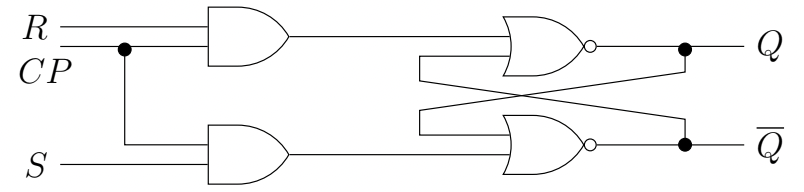

**Operación del Flip-flop SR síncrono**

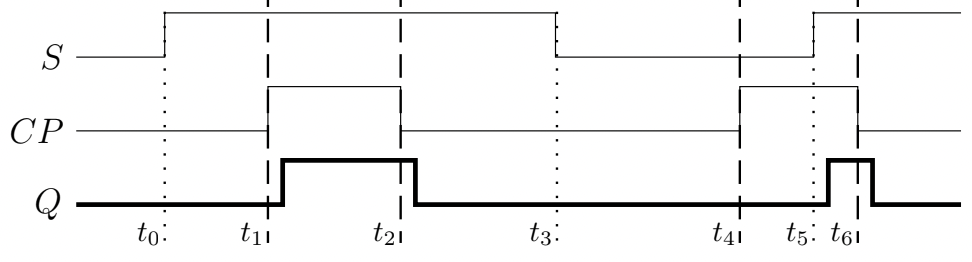

La salida cambia cuando hay un cambio en alguna de las entradas y mientras el pulso del reloj este habilitado.

Las líneas punteadas ($t_0$, $t_3$ y $t_5$) corresponden a cambios en la señal de $S$ mientras que las líneas quebradas ($t_1$, $t_2$, $t_4$ y $t_6$) corresponden a cambios en la señal del reloj ($CP$). 

La señal $S$ toma el valor 1 (sube) en $t_0$, pero como la señal $CP$ vale 0 (está abajo) la señal de $Q$ no cambia. En $t_1$ la señal de $S$ sigue estando alta y la señal de $CP$ sube, provocando que la señal de $Q$, con leve retardo, también suba. En $t_2$ la señal de $CP$ baja, por lo que la señal de $Q$ igualmente baja. En $t_3$, a pesar de que la señal de $S$ baja, la señal de $Q$ ya se encuentra baja, por lo que no cambia la salida. En $t_4$, la señal de $CP$ sube sin embargo la señal de $S$ permanece baja por lo que la señal de $Q$ también permance baja. En $t_5$ sube la señal de $CP$ y como la señal de $S$ se mantiene baja la señal de $Q$ permanece baja. En $t_5$ sube la señal de $S$ y la señal del reloj está alta, entonces la señal de $Q$ sube. En $t_6$, baja la señal de $CP$ provocando que baje la señal de $Q$ a pesar de que la señal de $S$ se encuentra alta.

In [5]:
class SynchFlipFlopSR(object):
    """
    Simulación de un flip-flo SR síncrono.
    """
    def __init__(self, Q = 0):
        self.Q = Q
        self.notQ = 1 - Q
        self.SR = FlipFlopSR()
        
    def run(self, S, R, CP = 1):
        CR = R * CP
        CS = S * CP
        self.Q, self.notQ = self.SR.run(S = CS, R = CR)
        
        return self.Q, self.notQ

In [6]:
SynchSR = SynchFlipFlopSR()
print(1, 0, SynchSR.run(S = 1, R = 0, CP = 1))
print(0, 0, SynchSR.run(S = 0, R = 0, CP = 1))
print(0, 1, SynchSR.run(S = 0, R = 1, CP = 1))
print(0, 0, SynchSR.run(S = 0, R = 0, CP = 1))
print(1, 0, SynchSR.run(S = 0, R = 1, CP = 0))

1 0 (1, 0)
0 0 (1, 0)
0 1 (0, 1)
0 0 (0, 1)
1 0 (0, 1)


## 4. Flip-flop D

Imita al circuito Flip-flop SR, pero garantiza que las únicas entradas que se presentan son $SR = 01$ y $SR = 10$ al alimentar la señal $D$ y su negación. De esta forma no hay posibilidad de que se presenten las entradas $SR = 00$ y $SR = 11$.

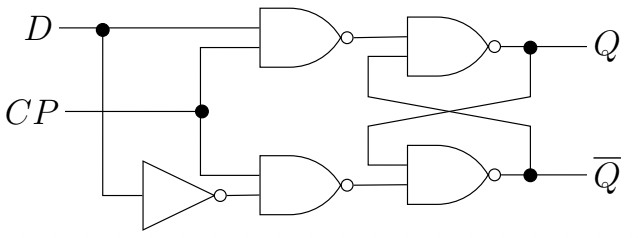

**Operación del Flip-flop D**

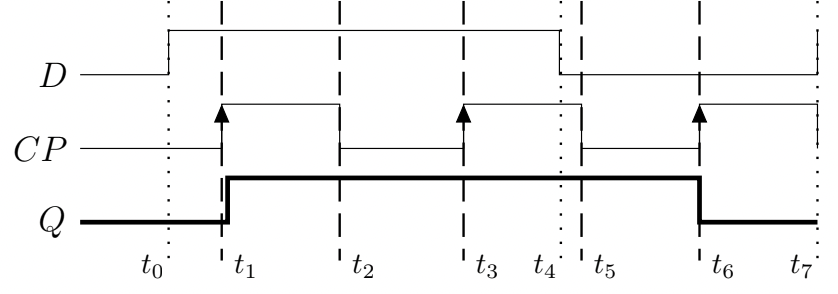

Los valores de entrada y el estado actual únicamente son observados cuando cambia el pulso del reloj de 0 a 1, además mantiene el valor alcanzado hasta el siguiente flanco ascedente del reloj, sin importar si cambian o no los valores de entrada. 

Es decir, si el valor de la entrada $D$ es 1, sin tener en cuenta el estado actual, el siguiente estado será 1 y permanecera así hasta que la entrada que se detecte sea 0 y la señal del pulso del reloj este arriba. 

Se consulta el valor de $D$ en $t_1$, $t_3$ y $t_6$, es decir, en los flancos ascendestes del $CP$. En $t_1$ se establece el valor de $Q = 1$. En $t_3$ como $D$ sigue valiendo 1, el valor de $Q$ se mantiene. En $t_6$ el valor de $D$ ya cambio por lo que $Q$ cambia a 0. Los cambios de señal de $D$ en $t_0$, $t_4$ y $t_7$ no afectan el valor de $Q$ porque no son simultaneos al flanco ascendente del $CP$.

In [7]:
class FlipFlopD(object):
    """
    Simulación de un flip-flop D.
    """
    def __init__(self, Q = 0):
        self.Q = Q
        self.notQ = 1 - Q
        self.flipflop = SynchFlipFlopSR(Q = Q)
        
    def run(self, D, CP = 1):
        notD = 1 - D
        self.Q, self.notQ = self.flipflop.run(S = D, R = notD, CP = CP)
        
        return self.Q, self.notQ

In [8]:
D = FlipFlopD()
print(D.Q, 0, D.run(D = 0))
print(D.Q, 1, D.run(D = 1))
print(D.Q, 1, D.run(D = 1))
print(D.Q, 0, D.run(D = 0))

0 0 (0, 1)
0 1 (1, 0)
1 1 (1, 0)
1 0 (0, 1)


## 5. Flip-flop JK

Es una extensión del circuito Flip-flop SR, a excepción de que todos sus estados están perfectamente determinados sin la inestabilidad que tiene el circuito Flip-flop cuando $SR = 11$. 

Tiene dos entradas, $J$ y $K$, y un pulso de reloj. Cambia de estado con el flanco cuando el pulso del reloj cambia de 1 a 0 (flanco descendente). 

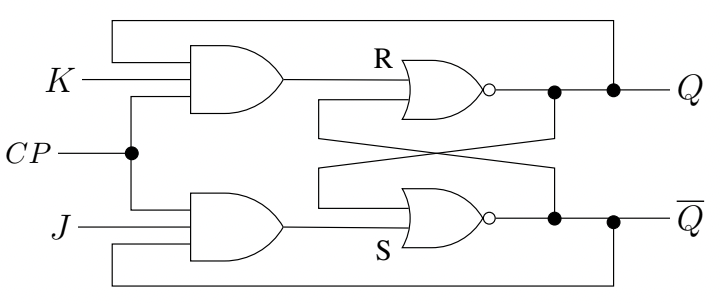

**Operación del Flip-flop JK**

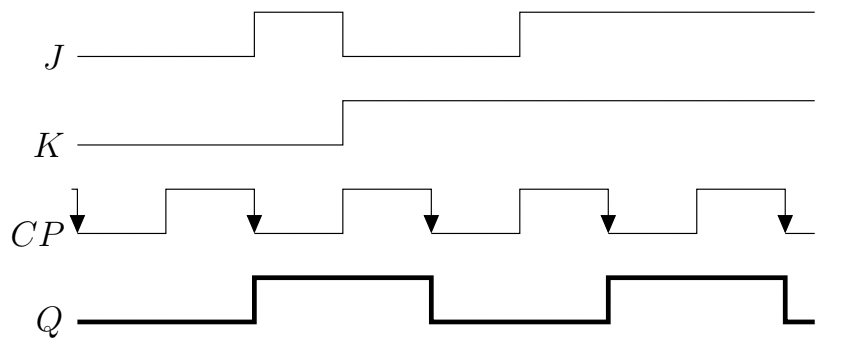

## **Ejercicio** 

1.- Describir la operación del Flip-flop JK. (Utilizar las descripciones de operación del Flip-flop SR y D)

En este caso solo se observan los valores de entrada y el estado actual en el momento en que cambia el pulso de reloj de 1 a 0, es decir, cuando hay una flanco descendente. Asimismo se mantienen los estados alcanzados hasta el siguiente flanco descendente del reloj, sin importar si cambian o no los valores de entrada de $J$ o $K$.

Sin embargo, de tener un flanco descendente se presentan los siguientes casos:
- Si $J$$K$ = 00 el estado permanece igual
- Si $J$$K$ = 10 se establece Q
- Si $J$$K$ = 01 se reestablece la señal
- Si $J$$K$ = 11 el estado se invierte

En este sentido los cambios solo se observan con el flanco descendente del reloj.

In [9]:
class FlipFlopJK(object):
    """
    Simulación de un flip-flop JK.
    """
    def __init__(self, Q = 0):
        self.Q = Q
        self.notQ = 1 - Q
        self.flipflop = FlipFlopSR()
        
    def run(self, J, K, CP = 1):
        if CP == 1:
            self.Q = J * self.notQ + (1 - K) * self.Q
            self.notQ = 1 - self.Q
        elif CP == 0:
            pass 
        
        return self.Q, self.notQ

In [10]:
JK = FlipFlopJK()

print('Q', 'J', 'K', ' Q', '¬Q')
for j in [0,1]:
    for k in [0,1]:
        JK.Q = 0
        JK.notQ = 1
        print(JK.Q, j,k, JK.run(J = j, K = k))
        
for j in [0,1]:
    for k in [0,1]:
        JK.Q = 1
        JK.notQ = 0
        print(JK.Q, j, k, JK.run(J = j, K = k))

Q J K  Q ¬Q
0 0 0 (0, 1)
0 0 1 (0, 1)
0 1 0 (1, 0)
0 1 1 (1, 0)
1 0 0 (1, 0)
1 0 1 (0, 1)
1 1 0 (1, 0)
1 1 1 (0, 1)


## 6. Flip-flop T

Es una versión simplificada del circuito Flip-flop JK, haciendo que la misma entrada alimente tanto a $J$ como a $K$. Su unica función es cambiar de estado en cada ciclo del reloj (*Toggle*) siempre que la entrada este habilitada, es decir, en el flanco ascendente del reloj. 




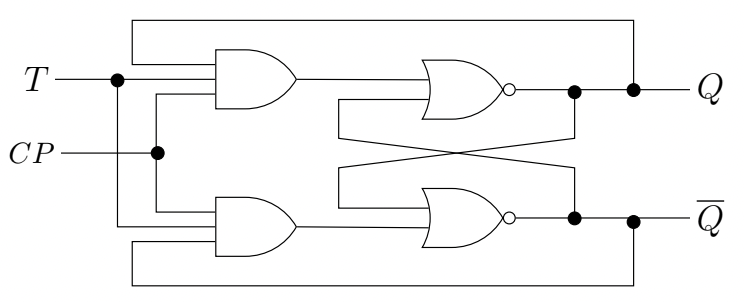

**Operación del Flip-flop T**

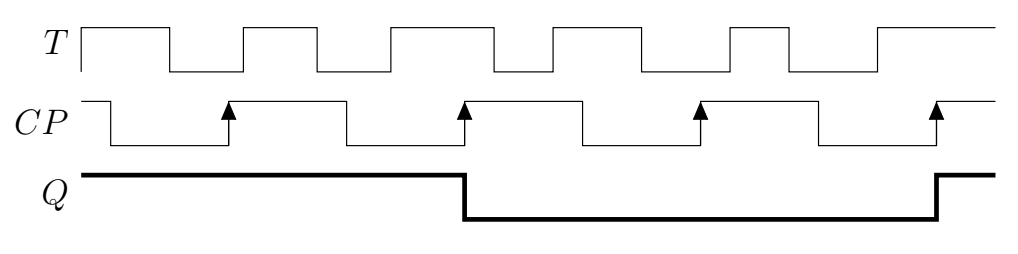

**Ejercicio** 

1.- Describir la operación del Flip-flop T. (Recordar que la señal de $T$ se detecta únicamente en el cambio del pulso del reloj de 0 a 1)

(Utilizar las descripciones de operación del Flip-flop SR y D)

En este caso solo se detectan los valores de entrada y el estado actual en el cambio del pulso de reloj de 0 a 1, es decir, cuando hay un flanco ascendente. Asimismo se mantienen los estados alcanzados hasta el siguiente flanco ascendente del reloj, sin importar si cambia o no el valor de $T$.

Sin embargo, de tener un flanco ascendente y una entrada T positiva: con un pequeño retardo la señal de Q se complementa (invierte).

En este sentido, de tener una entrada T constante positiva, se cambiaria el estado con cada flanco ascendente. (en esta operación no se presenta el caso)


In [11]:
class FlipFlopT(object):
    """
    Simulación de un Flip-flop T.
    """
    def __init__(self, Q = 0):
        self.Q = Q
        self.notQ = 1 - Q
        
    def run(self, T, CP = 1):
        if CP == 1:
            self.Q = T * self.notQ + (1 - T) * self.Q
            self.notQ = 1 - self.Q
        elif CP == 0:
            pass
            
        return self.Q, self.notQ

In [12]:
T = FlipFlopT()

print('Q', 'T', ' Q', '¬Q')
print(T.Q, 0,T.run(0))
print(T.Q, 1,T.run(1))
print(T.Q, 0,T.run(0))
print(T.Q, 1,T.run(1))

Q T  Q ¬Q
0 0 (0, 1)
0 1 (1, 0)
1 0 (1, 0)
1 1 (0, 1)


## 7. Transición de estados 

Los flip-flop pueden estudiarse a partir de los diagramas de transición. Por ejemplo, podemos usar un flip-flop JK para transitar sobre 4 estados según el valor de un símbolo binario.

In [13]:
class Transitions(object):
    """
    Transición a partir de flip-flop JK.
    Realiza transiciones:
    
            x = 0     x = 1
    At Bt At+1 Bt+1 At+1 Bt+1
    0  0   0    0    0    1
    0  1   0    1    1    0
    1  0   1    0    1    1
    1  1   1    1    0    0
    """
    def __init__(self, A = 0, B = 0):
        self.A = A
        self.B = B
        self.SR_A = FlipFlopJK()
        self.SR_B = FlipFlopJK()
        
    def run(self, x, CP = 1):
        not_x = 1 - x
        J_A = not_x * self.B
        K_A = x * self.B
        J_B = x
        K_B = self.A * x or (1 - self.A) * not_x
        
        self.A, notA = self.SR_A.run(J = J_A, K = K_A, CP = CP)
        self.B, notb = self.SR_B.run(J = J_B, K = K_B, CP = CP)
        
        return self.A, self.B

In [14]:
f = Transitions()

print('At','Bt', 'x','   At+1','Bt+1')
print(f.A,f.B, '-', 0, '->', f.run(0))
print(f.A,f.B, '-', 1, '->', f.run(1))
print(f.A,f.B, '-', 1, '->', f.run(1))
print(f.A,f.B, '-', 0, '->', f.run(0))
print(f.A,f.B, '-', 0, '->', f.run(0))
print(f.A,f.B, '-', 1, '->', f.run(1))
print(f.A,f.B, '-', 0, '->', f.run(0))
print(f.A,f.B, '-', 1, '->', f.run(1))

At Bt x    At+1 Bt+1
0 0 - 0 -> (0, 0)
0 0 - 1 -> (0, 1)
0 1 - 1 -> (0, 1)
0 1 - 0 -> (1, 0)
1 0 - 0 -> (1, 0)
1 0 - 1 -> (1, 1)
1 1 - 0 -> (1, 1)
1 1 - 1 -> (0, 0)


## 8. Contadores 

Los contadores son circuitos secuenciales que cuentan de 0 a n; es decir que transitan de un estado binario al siguiente siempre con 1.

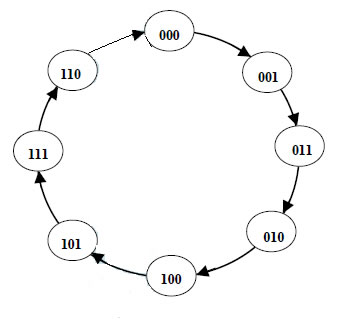

## 8.1 Contador de 2 bits (0 a 3)

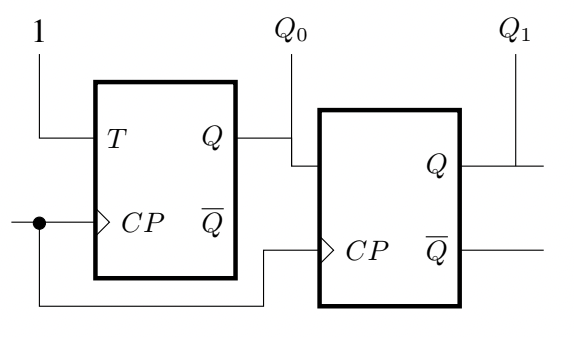

**Estados del contador de 2 bits**

| $Q_0$ | $Q_1$ | Binario ($Q_1Q_0$) | Decimal |
| :-: | :-: | :-: | :-: | 
| 0 | 0 | 00 | 0 |
| 1 | 0 | 01 | 1 |
| 0 | 1 | 10 | 2 |
| 1 | 1 | 11 | 3 |
| 0 | 0 | 00 | 0 |

In [15]:
class Counter2(object):
    def __init__(self, Q_0 = 0, Q_1 = 0):
        self.Q_0 = Q_0
        self.Q_1 = Q_1
        self.T_Q0 = FlipFlopT()
        self.T_Q1 = FlipFlopT()
    
    # Deben utilizar la clase FlipFlopT
    # -para construir un contador de 2 bits se pueden conectar dos circuitos flip flop T-
    # Crear una función que se llame count2 y que simule el contador de 2 bits.
    def count2(self, x, CP = 1):
        T_Q1 = x * self.Q_0 
        self.Q_1, notQ_1 = self.T_Q1.run(T = T_Q1, CP = CP)  
        T_Q0 = x
        self.Q_0, notQ_0 = self.T_Q0.run(T = T_Q0, CP = CP)
        
        return 2 * self.Q_1 + self.Q_0

In [16]:
# Imprimir los valores del contador. Deben de imprimir el 0, 1, 2 y 3 utilizando 
# la función count2 que han implementado anteriormente. 
c2 = Counter2()

# La estructura de como deben de imprimir es la siguiente:

# Q_0  Q_1  Binario  Decimal
#  0    1     10        2

# espacio
_ = ' '

print('Q_0',  _, 'Q_1', _,  'Binario', _, 'Decimal')

# 'v' - se usa para ejecutar y guardar el "valor" decimal del contador en una variable  
i = 0
while(i < 5):
    if i == 0:
        v0 = c2.count2(0)
        print(c2.Q_0, _, _, c2.Q_1, _, '-', _, c2.Q_1, c2.Q_0, _, '->', _, v0)
        i += 1
    else:
        v0 = c2.count2(1)
        print(c2.Q_0, _, _, c2.Q_1, _, '-', _, c2.Q_1, c2.Q_0, _, '->', _, v0)
        i += 1
        
# Utilicen la tabla de estados del contador de 3 bits para verificar que su 
# contador es correcto

Q_0   Q_1   Binario   Decimal
0     0   -   0 0   ->   0
1     0   -   0 1   ->   1
0     1   -   1 0   ->   2
1     1   -   1 1   ->   3
0     0   -   0 0   ->   0


## 8.2 Contador de 3 bits (0 a 7)

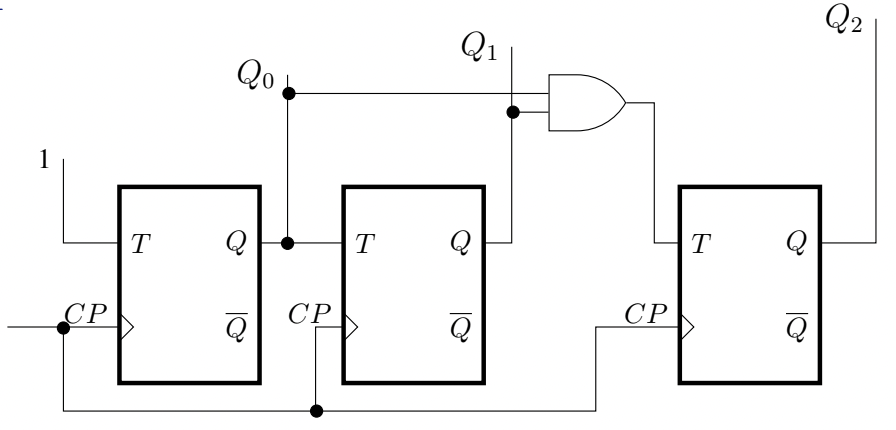

**Estados del contador de 3 bits**

| $Q_0$ | $Q_1$ | $Q_2$ | Binario ($Q_2Q_1Q_0$) | Decimal |
| :-: | :-: | :-: | :-: | :-: | 
| 0 | 0 | 0 | 000 | 0 |
| 1 | 0 | 0 | 001 | 1 |
| 0 | 1 | 0 | 010 | 2 |
| 1 | 1 | 0 | 011 | 3 |
| 0 | 0 | 1 | 100 | 4 |
| 1 | 0 | 1 | 101 | 5 |
| 0 | 1 | 1 | 110 | 6 |
| 1 | 1 | 1 | 111 | 7 |
| 0 | 0 | 0 | 000 | 0 |

In [17]:
class Counter3():
    def __init__(self, Q_0 = 0, Q_1 = 0, Q_2 = 0):
        self.T1 = FlipFlopT()
        self.T2 = FlipFlopT()
        self.T3 = FlipFlopT()
        
        self.Q_0, self.Q_1, self.Q_2 = Q_0, Q_1, Q_2
    
    # Crear una función que se llame count3 y que simule el contador de 3 bits.
    # Deben utilizar la clase FlipFlopT
    def count3(self, x, CP = 1):
        T_2 = x * self.Q_0 * self.Q_1
        self.Q_2, notQ_2 = self.T1.run(T = T_2, CP = CP)
        T_1 = x * self.Q_0
        self.Q_1, notQ_1 = self.T2.run(T = T_1, CP = CP)
        T_0 = x      
        self.Q_0, notQ_0 = self.T3.run(T = T_0, CP = CP)
        
        return  4 * self.Q_2 + 2 * self.Q_1 + self.Q_0   

In [18]:
# Imprimir los valores del contador. Deben de imprimir el 0, 1, 2, 3, 4, 5, 6 y 7 
# utilizando la función count3 que han implementado anteriormente. 
c3 = Counter3()

# La estructura de como deben de imprimir es la siguiente:

# Q_0  Q_1  Q_2  Binario  Decimal
#  0    1    0     010       2

print('Q_0', _, 'Q_1', _, 'Q_2', _, _, 'Binario', _, 'Decimal')

# 'v' - se usa para ejecutar y guardar el "valor" decimal del contador en una variable
i = 0
while(i < 9):
    if i == 0:
        v0 = c3.count3(0)
        print(c3.Q_0, _, _, c3.Q_1, _, _, c3.Q_2, _, '-', _, c3.Q_2, c3.Q_1, c3.Q_0, _, '->', _, v0)   
        i += 1
    else:
        v0 = c3.count3(1)
        print(c3.Q_0, _, _, c3.Q_1, _, _, c3.Q_2, _, '-', _, c3.Q_2, c3.Q_1, c3.Q_0, _, '->', _, v0)
        i += 1
        
# Utilicen la tabla de estados del contador de 3 bits para verificar que su 
# contador está bien.

Q_0   Q_1   Q_2     Binario   Decimal
0     0     0   -   0 0 0   ->   0
1     0     0   -   0 0 1   ->   1
0     1     0   -   0 1 0   ->   2
1     1     0   -   0 1 1   ->   3
0     0     1   -   1 0 0   ->   4
1     0     1   -   1 0 1   ->   5
0     1     1   -   1 1 0   ->   6
1     1     1   -   1 1 1   ->   7
0     0     0   -   0 0 0   ->   0


## 8.3 Contador de 4 bits (0 a 15)

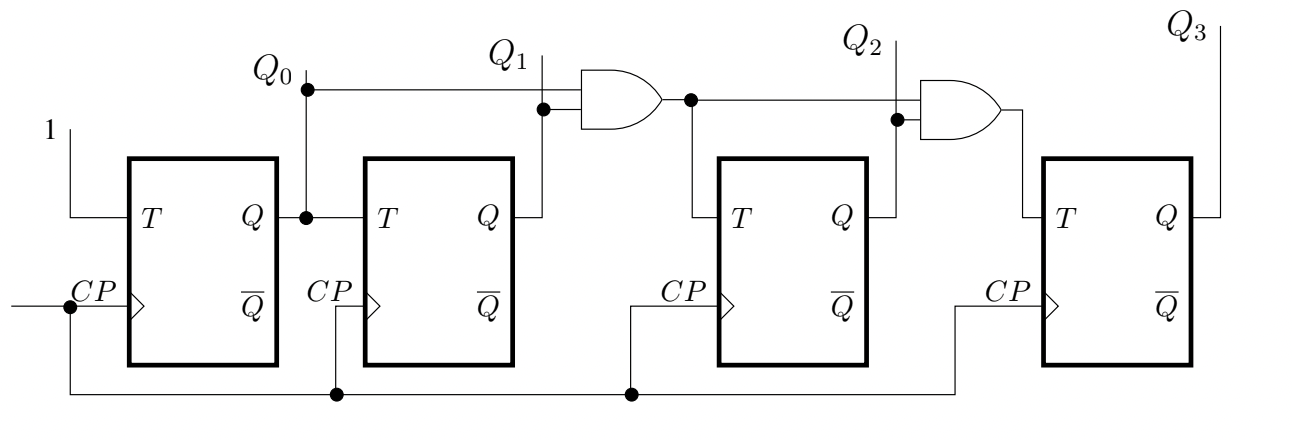

**Estados del contador de 4 bits**

| $Q_0$ | $Q_1$ | $Q_2$ | $Q_3$ | Binario ($Q_3Q_2Q_1Q_0$) | Decimal |
| :-: | :-: | :-: | :-: | :-: | :-: | 
| 0 | 0 | 0 | 0 | 0000 | 0 |
| 1 | 0 | 0 | 0 | 0001 | 1 |
| 0 | 1 | 0 | 0 | 0010 | 2 |
| 1 | 1 | 0 | 0 | 0011 | 3 |
| 0 | 0 | 1 | 0 | 0100 | 4 |
| 1 | 0 | 1 | 0 | 0101 | 5 |
| 0 | 1 | 1 | 0 | 0110 | 6 |
| 1 | 1 | 1 | 0 | 0111 | 7 |
| 0 | 0 | 0 | 1 | 1000 | 8 |
| 1 | 0 | 0 | 1 | 1001 | 9 |
| 0 | 1 | 0 | 1 | 1010 | 10 |
| 1 | 1 | 0 | 1 | 1011 | 11 |
| 0 | 0 | 1 | 1 | 1100 | 12 |
| 1 | 0 | 1 | 1 | 1101 | 13 |
| 0 | 1 | 1 | 1 | 1110 | 14 |
| 1 | 1 | 1 | 1 | 1111 | 15 |
| 0 | 0 | 0 | 0 | 0000 | 0 |

In [19]:
class Counter4():
    def __init__(self, Q_0 = 0, Q_1 = 0, Q_2 = 0, Q_3 = 0):
        self.T1 = FlipFlopT(Q = 0)
        self.T2 = FlipFlopT(Q = 0)
        self.T3 = FlipFlopT(Q = 0)
        self.T4 = FlipFlopT(Q = 0)
        
        self.Q_0, self.Q_1, self.Q_2, self.Q_3 = Q_0, Q_1, Q_2, Q_3
    
    # Crear una función que se llame count4 y que simule el contador de 4 bits.
    # Deben utilizar la clase FlipFlopT
    def count4(self, x, CP = 1):
        T_3 = x * self.Q_0 * self.Q_1 * self.Q_2
        self.Q_3, notQ_3 = self.T4.run(T = T_3, CP = CP)
        T_2 = x * self.Q_0 * self.Q_1 * self.Q_1
        self.Q_2, notQ_2 = self.T1.run(T = T_2, CP = CP)
        T_1 = x * self.Q_0
        self.Q_1, notQ_1 = self.T2.run(T = T_1, CP = CP)
        T_0 = x      
        self.Q_0, notQ_0 = self.T3.run(T = T_0, CP = CP)
        
        return 8 * self.Q_3 + 4 * self.Q_2 + 2 * self.Q_1 + self.Q_0
        

In [20]:
# Imprimir los valores del contador. Deben de imprimir el 0, 1, 2, 3, 4, 5, 6, 7, 8
# 9, 10, 11, 12, 13, 14 y 15 utilizando la función count3 que han implementado 
# anteriormente. 
c4 = Counter4()

# La estructura de como deben de imprimir es la siguiente:

# Q_0  Q_1  Q_2  Q_3  Binario  Decimal
#  0    1    0    0    0010       2

print('Q_0', _, 'Q_1', _, 'Q_2', _, 'Q_3', _, _, 'Binario', _, 'Decimal')

# 'v' - se usa para ejecutar y guardar el "valor" decimal del contador en una variable  
i = 0
while(i < 17):
    if i == 0:
        v0 = c4.count4(0)
        print(c4.Q_0, _, _, c4.Q_1, _, _, c4.Q_2, _, _, c4.Q_3, _, '-', _,  c4.Q_3, c4.Q_2, c4.Q_1, c4.Q_0, '->', _, v0)  
        i += 1
    else:
        v0 = c4.count4(1)
        print(c4.Q_0, _, _, c4.Q_1, _, _, c4.Q_2, _, _, c4.Q_3, _, '-', _,  c4.Q_3, c4.Q_2, c4.Q_1, c4.Q_0, '->', _, v0)
        i += 1

# Utilicen la tabla de estados del contador de 3 bits para verificar que su 
# contador está bien.

Q_0   Q_1   Q_2   Q_3     Binario   Decimal
0     0     0     0   -   0 0 0 0 ->   0
1     0     0     0   -   0 0 0 1 ->   1
0     1     0     0   -   0 0 1 0 ->   2
1     1     0     0   -   0 0 1 1 ->   3
0     0     1     0   -   0 1 0 0 ->   4
1     0     1     0   -   0 1 0 1 ->   5
0     1     1     0   -   0 1 1 0 ->   6
1     1     1     0   -   0 1 1 1 ->   7
0     0     0     1   -   1 0 0 0 ->   8
1     0     0     1   -   1 0 0 1 ->   9
0     1     0     1   -   1 0 1 0 ->   10
1     1     0     1   -   1 0 1 1 ->   11
0     0     1     1   -   1 1 0 0 ->   12
1     0     1     1   -   1 1 0 1 ->   13
0     1     1     1   -   1 1 1 0 ->   14
1     1     1     1   -   1 1 1 1 ->   15
0     0     0     0   -   0 0 0 0 ->   0


## 9. Puntos extra

1.- Crear un contador de 3 bits en Logisim (0.5 puntos)

2.- Crear un contador de 4 bits en Logisim (0.5 puntos)

Nota: Pueden utilizar los componentes Biestable T y Constante.